In [9]:
import numpy as np
from os.path import abspath
from os import chdir
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa import holtwinters as ETS
from sklearn.model_selection import train_test_split

In [11]:
abspath('')

'/mnt/c/Users/Rajkumar/OneDrive - The George Washington University/Time Series Analysis/Project'

In [12]:
chdir(abspath('..'))

In [13]:
abspath('')

'/mnt/c/Users/Rajkumar/OneDrive - The George Washington University/Time Series Analysis'

In [14]:
df = pd.read_csv("All_Data/AirPassengers.csv", index_col='Month', parse_dates=True, header=0)

In [15]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [16]:
y_train, y_test = train_test_split(df['#Passengers'], shuffle=False,
                                   test_size=0.3)

In [18]:
df.shape[0]

144

In [19]:
y_train.shape

(100,)

In [20]:
y_test.shape

(44,)

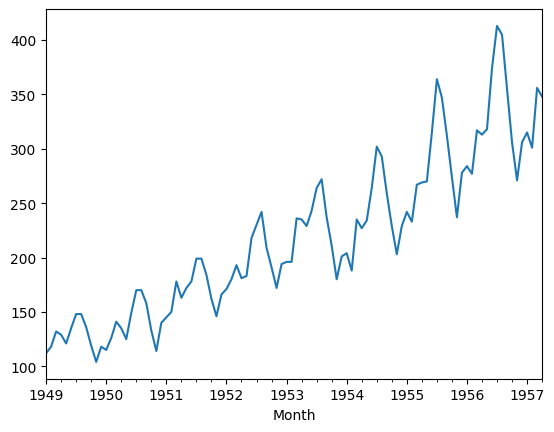

In [21]:
y_train.plot()
plt.show()

In [23]:
holtl = ETS.ExponentialSmoothing(y_train, trend='mul', seasonal=None, damped=False).fit()

/tmp/ipykernel_228/663204740.py:1: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  holtl = ETS.ExponentialSmoothing(y_train, trend='mul', seasonal=None, damped=False).fit()
/home/rajkumarcm/venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [25]:
forecast = holtl.forecast(steps=len(y_test))

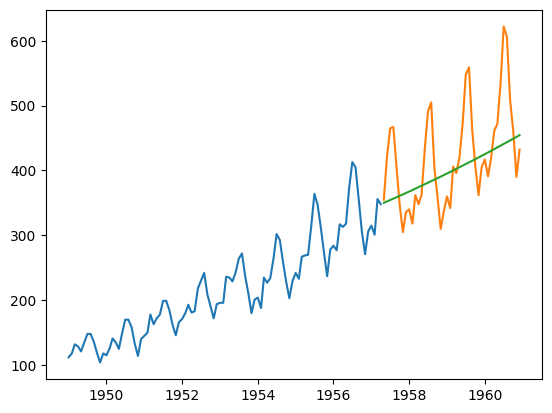

In [28]:
plt.plot(y_train, label='train')
plt.plot(y_test, label='test')
plt.plot(forecast, label='forecast')
plt.show()

In [30]:
holtw = ETS.ExponentialSmoothing(y_train, trend='mul', seasonal='mul', damped=True).fit()

/tmp/ipykernel_228/1890021366.py:1: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  holtw = ETS.ExponentialSmoothing(y_train, trend='mul', seasonal='mul', damped=True).fit()
/home/rajkumarcm/venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/rajkumarcm/venv/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [31]:
seasonal_forecast = holtw.forecast(steps=len(y_test))

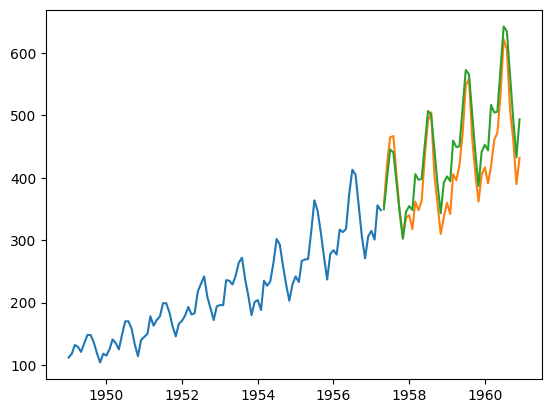

In [33]:
plt.plot(y_train, label='train')
plt.plot(y_test, label='test')
plt.plot(seasonal_forecast, label='forecast')
plt.show()

In [49]:
residuals = y_train - holtw.predict(start=0, end=len(y_train))

In [50]:
from statsmodels.graphics.tsaplots import plot_acf

In [53]:
np.mean(np.square(residuals))

46.2464271888226

In [46]:
e = np.subtract(y_test, seasonal_forecast)
mse = (1/len(y_train)) * (e.T @ e)

In [47]:
mse

637.7498702179229

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
scaler = StandardScaler()

In [63]:
df['#Passengers'].values.reshape([-1, 1])

(144,)

In [64]:
df_scaled = scaler.fit_transform(df['#Passengers'].values.reshape([-1, 1]))

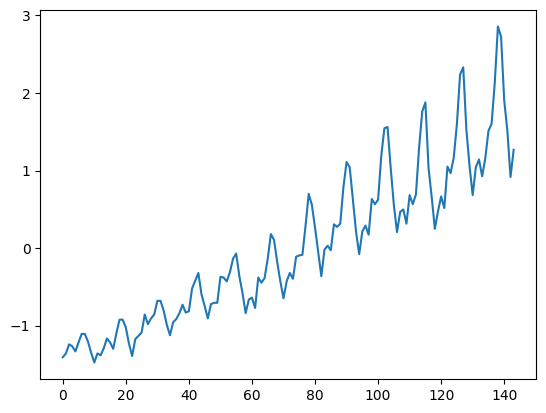

In [66]:
plt.plot(df_scaled[:, 0])
plt.show()

In [67]:
back_to_df = scaler.inverse_transform(df_scaled)

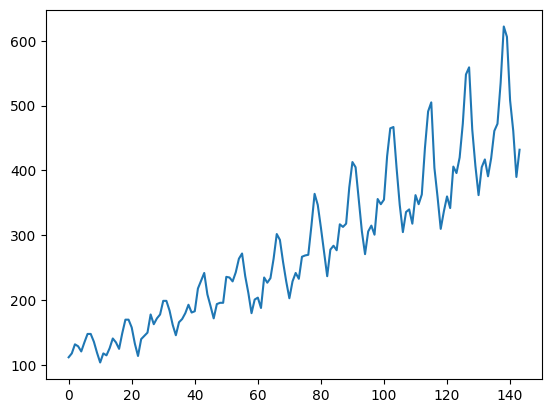

In [69]:
plt.plot(back_to_df[:, 0])
plt.show()